### Import of the libraries 

In [1]:
# Pandas for data processing 
import pandas as pd

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading of the dataset and early cleaning

In [2]:
#erasmus_df = pd.read_csv("Erasmus_mobility_statistics_2014_2019.csv",sep=',',low_memory=False)
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

erasmus_df

c:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,42,AT,Wels,BRG Wels Wallererstraße,ES,Malaga,Escuela de Idiomas Nerja,1.0
1,2014-2015,2014-07,2014-08,7.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,25,AT,Wels,BRG Wels Wallererstraße,UK,Canterbury,Pilgrims LTD,1.0
2,2014-2015,2014-07,2014-08,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,51,AT,Wels,BRG Wels Wallererstraße,UK,London,St. Giles International,1.0
3,2014-2015,2014-08,2014-08,12.0,Staff training abroad,Language acquisition,CZ,??? - ? Unknown ?,Female,Staff,No,No,No,34,AT,Wels,BRG Wels Wallererstraße,UK,London,EF Language Center,1.0
4,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,53,AT,Schwarzach,Volksschule Schwarzach,IE,Dublin,Centre of English Studies,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462263,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462264,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462265,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462266,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


### Cleaning and dropping columns

In [3]:
def drop_ages(x):
    if int(x) > 90 or int(x) < 15:
        return np.nan
    else:
        return x

In [4]:
#Delete the staff an teaching to focus on students
#erasmus_df = erasmus_df[(~erasmus_df['Activity (mob)'].str.contains("Staff"))&(~erasmus_df['Activity (mob)'].str.contains("teaching"))&(~erasmus_df['Activity (mob)'].str.contains("Teaching"))]
erasmus_df = erasmus_df[erasmus_df['Participant Profile']!='Staff']

#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=400]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")

erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("? Unknown ?","Unknown")

#Datatype changes
erasmus_df['PParticipant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Participants'] = erasmus_df['Participants'].astype('int')

<ipython-input-4-66cb7663f8b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)


In [5]:
print("There are  {}  exchange students in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  2644097  exchange students in our Dataset
There are 22 features (columns) in our dataset


## Data Analysis

In [6]:
#erasmus_df.groupby('Mobility Duration').count().plot(y='Academic Year',kind='bar',figsize=(15,8),title='Days of exchange')

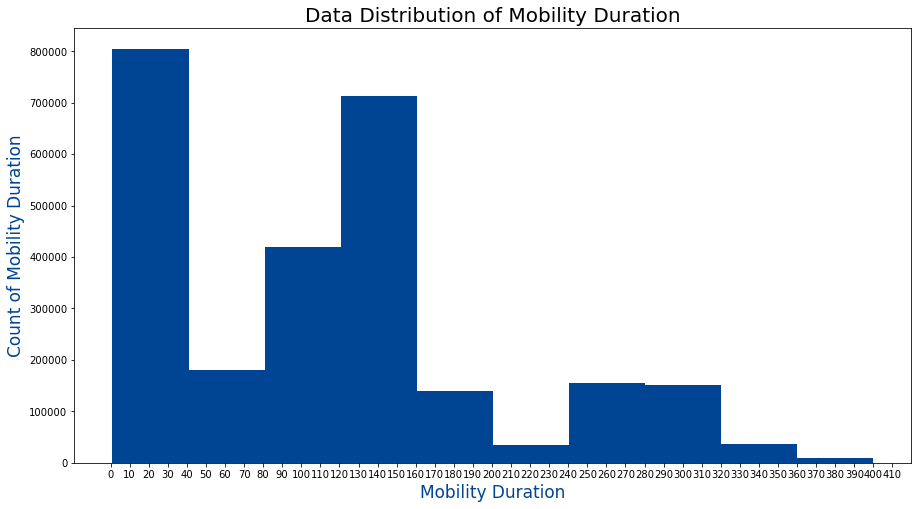

In [7]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="#004494")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,10)])
axs.set_xlabel("Mobility Duration", color="#004494", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="#004494", fontsize=17)

plt.show()

In [8]:
mean_ages_from_activity = erasmus_df[['Participant Age','Activity (mob)']].dropna()
mean_ages_from_activity['Participant Age'] = mean_ages_from_activity['Participant Age'].astype('int')
mean_ages_from_activity = round(mean_ages_from_activity.groupby('Activity (mob)').mean())

mean_ages_from_activity

,Participant Age
Activity (mob),
Advance Planning Visit,30.0
Advance Planning Visit - EVS,29.0
Advance Planning Visit - Erasmus- PRO,46.0
Advance Planning Visit – EVS,30.0
Advance Planning Visit – Youth Exchange,29.0
ErasmusPro - Mobility of VET learners (3 to 12 months),21.0
European Voluntary Service - Partner Countries,24.0
European Voluntary Service - Programme Countries,23.0
Group Volunteering Activities,23.0


In [9]:
erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants

Participant Nationality
DE    319744
FR    319655
ES    278792
IT    270212
TR    136046
Name: Participants, dtype: int64

In [11]:
erasmus_df.groupby('Sending Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Country Code
FR    330627
DE    324219
ES    285013
IT    272719
TR    136790
Name: Participants, dtype: int64

In [10]:
erasmus_df.groupby('Receiving Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving Country Code
ES    367117
DE    259442
UK    242507
IT    223985
FR    201725
Name: Participants, dtype: int64

In [12]:
erasmus_df.groupby('Receiving City').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving City
London       35044
Barcelona    26887
Berlin       24453
Madrid       21266
Paris        21092
Name: Participants, dtype: int64

In [13]:
erasmus_df.groupby('Sending City').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending City
Budapest    21175
MADRID      20594
MILANO      19643
VALENCIA    18764
Paris       18516
Name: Participants, dtype: int64

In [14]:
erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants

Receiving Organization
UNIVERSITAT DE VALENCIA                         11733
ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA    11686
UNIVERSIDAD DE GRANADA                          10826
UNIVERSIDADE DE LISBOA                          10741
UNIVERSIDAD COMPLUTENSE DE MADRID                9603
Name: Participants, dtype: int64

In [15]:
erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants

Sending Organization
ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA    14744
UNIVERSIDAD DE GRANADA                          11599
UNIVERSITA DEGLI STUDI DI PADOVA                 9960
UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA       9453
UNIVERSIDAD COMPLUTENSE DE MADRID                9375
Name: Participants, dtype: int64